In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dense

In [26]:
data = pd.read_csv('goog.csv', parse_dates=['Date'], index_col='Date')
data = data[['Close']].dropna()  # Ensure no missing values

In [27]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [28]:
x = []
y = []
seq_len = 10

for i in range(seq_len, len(scaled_data)):
    x.append(scaled_data[i - seq_len:i])
    y.append(scaled_data[i])

x = np.array(x)
y = np.array(y)

In [29]:
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [30]:
print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)
print("Total rows in data:", len(scaled_data))

Train shape: (40, 10, 1) (40, 1)
Test shape: (11, 10, 1) (11, 1)
Total rows in data: 61


In [31]:
model = Sequential([
    Input(shape=(seq_len, 1)),
    SimpleRNN(50, activation='tanh'),
    Dense(1)
])

In [32]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_test, y_test))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - loss: 0.1638 - val_loss: 0.0681
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0254 - val_loss: 0.0122
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0767 - val_loss: 0.0112
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0655 - val_loss: 0.0204
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0258 - val_loss: 0.0692
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0265 - val_loss: 0.1297
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0365 - val_loss: 0.1438
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0410 - val_loss: 0.1142
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0318 - val_loss: 0.0706
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0229 - val_loss: 0.0365


In [33]:
predicted = model.predict(x_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Print first 10 predictions vs actual
print("Index\tActual\t\tPredicted")
for i in range(min(10, len(actual))):
    print(f"{i}\t{actual[i][0]:.2f}\t\t{predicted[i][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Index	Actual		Predicted
0	829.08		826.30
1	827.78		825.67
2	831.91		826.36
3	835.37		826.70
4	838.68		826.99
5	843.25		826.49
6	845.54		825.33
7	845.62		825.98
8	847.20		829.13
9	848.78		828.98


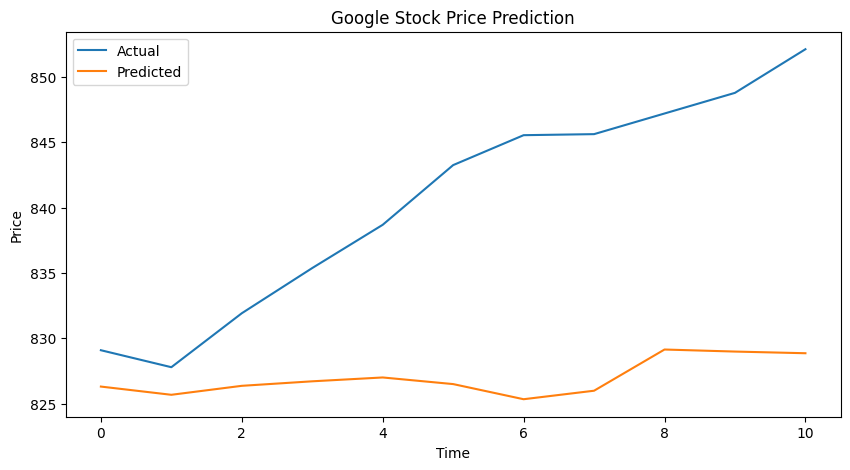

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()